In [3]:
import nltk
import os
import re
import pandas as pd
import nltk.corpus
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer

In [4]:
# Read Dataset
corpus_text  = []
data=pd.read_csv("english-train.csv")
data.head()

,headline,Label
0,Former New Zealand cricketer Chris Cairns diag...,Sports
1,American skater Nathan Chen dazzles in his Oly...,Sports
2,La Liga: Enes Unal scores brace to lead Getafe...,Sports
3,U-19 World Cup: Australia beat Afghanistan to ...,Sports
4,ICC U-19 World Cup India vs England final Live...,Sports


In [5]:
# Remove Punc
data["No_punc"] = data["headline"].str.replace('[^\w\s]','')
data.head()

C:\Users\Cyril\AppData\Local\Temp\ipykernel_2512\2221542479.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  data["No_punc"] = data["headline"].str.replace('[^\w\s]','')


,headline,Label,No_punc
0,Former New Zealand cricketer Chris Cairns diag...,Sports,Former New Zealand cricketer Chris Cairns diag...
1,American skater Nathan Chen dazzles in his Oly...,Sports,American skater Nathan Chen dazzles in his Oly...
2,La Liga: Enes Unal scores brace to lead Getafe...,Sports,La Liga Enes Unal scores brace to lead Getafes...
3,U-19 World Cup: Australia beat Afghanistan to ...,Sports,U19 World Cup Australia beat Afghanistan to cl...
4,ICC U-19 World Cup India vs England final Live...,Sports,ICC U19 World Cup India vs England final Live ...


In [6]:
# Converts to lowercase
data['No_punc']=data['No_punc'].apply(str.lower)
data.head()

,headline,Label,No_punc
0,Former New Zealand cricketer Chris Cairns diag...,Sports,former new zealand cricketer chris cairns diag...
1,American skater Nathan Chen dazzles in his Oly...,Sports,american skater nathan chen dazzles in his oly...
2,La Liga: Enes Unal scores brace to lead Getafe...,Sports,la liga enes unal scores brace to lead getafes...
3,U-19 World Cup: Australia beat Afghanistan to ...,Sports,u19 world cup australia beat afghanistan to cl...
4,ICC U-19 World Cup India vs England final Live...,Sports,icc u19 world cup india vs england final live ...


In [7]:
# remove nos
nos = re.compile(r'[0-9]')
data['No_punc'] = data['No_punc'].str.replace(nos, '')
data.head()

,headline,Label,No_punc
0,Former New Zealand cricketer Chris Cairns diag...,Sports,former new zealand cricketer chris cairns diag...
1,American skater Nathan Chen dazzles in his Oly...,Sports,american skater nathan chen dazzles in his oly...
2,La Liga: Enes Unal scores brace to lead Getafe...,Sports,la liga enes unal scores brace to lead getafes...
3,U-19 World Cup: Australia beat Afghanistan to ...,Sports,u world cup australia beat afghanistan to clai...
4,ICC U-19 World Cup India vs England final Live...,Sports,icc u world cup india vs england final live st...


In [8]:
# Remove stopwords
#nltk.download('stopwords')

from nltk.corpus import stopwords
stop_words = stopwords.words('english')
data['No_punc'] = data['No_punc'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
data['No_punc'].head()

0    former new zealand cricketer chris cairns diag...
1    american skater nathan chen dazzles olympic re...
2    la liga enes unal scores brace lead getafes wi...
3    u world cup australia beat afghanistan claim r...
4    icc u world cup india vs england final live st...
Name: No_punc, dtype: object

In [9]:
data['No_punc'].astype(str)
data['No_punc'].dtype


dtype('O')

In [10]:
# Lemmatization

from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    words = text.split()
    words = [lemmatizer.lemmatize(word,pos='v') for word in words]
    return ' '.join(words)

data['No_punc'] = data['No_punc'].apply(lemmatize_words)
data['No_punc']


0        former new zealand cricketer chris cairns diag...
1        american skater nathan chen dazzle olympic return
2        la liga enes unal score brace lead getafes win...
3        u world cup australia beat afghanistan claim r...
4        icc u world cup india vs england final live st...
                               ...                        
37390      shoot allu arjunstarrer pushpa resume hyderabad
37391    shweta tripathi join taapsee pannus rashmi rocket
37392             taapsee pannu join mishan impossible set
37393    bts members make runway debut louis vuitton fa...
37394    cloy star hyun bin sing shallow fan sweep feet...
Name: No_punc, Length: 37395, dtype: object

In [11]:
# Vectorization
#feature = data["No_punc"]
#from sklearn.feature_extraction.text import CountVectorizer
#cv = CountVectorizer()
#count_vector=cv.fit(feature)

#print(cv.vocabulary_)

#cv.transform(feature)
#from sklearn import preprocessing
#le = preprocessing.LabelEncoder()


# Remove single characters

single_charac = re.compile(r'\W*\b\w{1}\b')
data['No_punc'] = data['No_punc'].str.replace(single_charac, '')

#Extra spaces
data['No_punc'] = data['No_punc'].replace(r'\s+', ' ', regex=True)
data.head()



,headline,Label,No_punc
0,Former New Zealand cricketer Chris Cairns diag...,Sports,former new zealand cricketer chris cairns diag...
1,American skater Nathan Chen dazzles in his Oly...,Sports,american skater nathan chen dazzle olympic return
2,La Liga: Enes Unal scores brace to lead Getafe...,Sports,la liga enes unal score brace lead getafes win...
3,U-19 World Cup: Australia beat Afghanistan to ...,Sports,world cup australia beat afghanistan claim rd...
4,ICC U-19 World Cup India vs England final Live...,Sports,icc world cup india vs england final live stre...


In [12]:
import tensorflow
import tensorflow.keras as keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence

f=data['No_punc']

tokenizer = Tokenizer()
tokenizer.fit_on_texts(f)


# determine the vocabulary size
vocab_size = len(tokenizer.word_index) + 1
print('Vocabulary Size: %d' % vocab_size)

Vocabulary Size: 27290


In [13]:
t = tokenizer.texts_to_sequences(f)
print(t[:5])


[[348, 3, 287, 1960, 904, 4493, 6204, 11255, 1764], [2151, 15114, 4813, 15115, 5631, 725, 84], [1118, 1292, 15116, 15117, 572, 3350, 96, 15118, 15, 9188], [18, 36, 172, 140, 986, 223, 582, 594], [484, 18, 36, 2, 12, 76, 86, 58, 155, 9]]


[[    0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0   348     3   287  1960   904  4493  6204 11255  1764]
 [    0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0  2151 15114  4813 15115  5631   725    84]
 [    0     0     0     0     0     0     0     0     0     0     0     0
      0     0  1118  1292 15116 15117   572  3350    96 15118    15  9188]
 [    0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0    18    36   172   140   986   223   582   594]
 [    0     0     0     0     0     0     0     0     0     0     0     0
      0     0   484    18    36     2    12    76    86    58   155     9]]


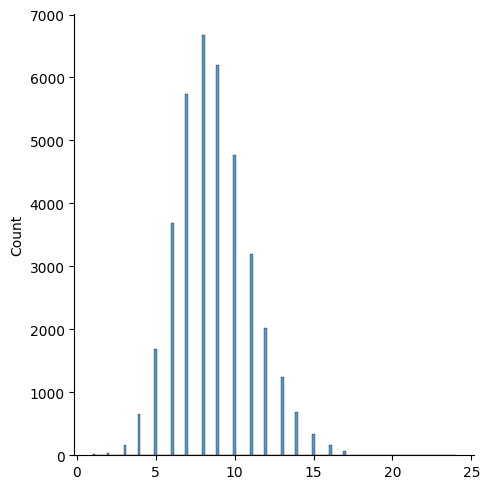

In [14]:
# Padding

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

t_lens = [len(n) for n in t]
t_lens

sns.displot(t_lens)
max_len = t_lens[np.argmax(t_lens)]
max_len #24

t_pad = sequence.pad_sequences(t, maxlen=max_len)
print(t_pad[:5])

In [15]:
data['Tokenized'] = t
data.head()

,headline,Label,No_punc,Tokenized
0,Former New Zealand cricketer Chris Cairns diag...,Sports,former new zealand cricketer chris cairns diag...,"[348, 3, 287, 1960, 904, 4493, 6204, 11255, 1764]"
1,American skater Nathan Chen dazzles in his Oly...,Sports,american skater nathan chen dazzle olympic return,"[2151, 15114, 4813, 15115, 5631, 725, 84]"
2,La Liga: Enes Unal scores brace to lead Getafe...,Sports,la liga enes unal score brace lead getafes win...,"[1118, 1292, 15116, 15117, 572, 3350, 96, 1511..."
3,U-19 World Cup: Australia beat Afghanistan to ...,Sports,world cup australia beat afghanistan claim rd...,"[18, 36, 172, 140, 986, 223, 582, 594]"
4,ICC U-19 World Cup India vs England final Live...,Sports,icc world cup india vs england final live stre...,"[484, 18, 36, 2, 12, 76, 86, 58, 155, 9]"


In [16]:
t_pad

array([[    0,     0,     0, ...,  6204, 11255,  1764],
       [    0,     0,     0, ...,  5631,   725,    84],
       [    0,     0,     0, ..., 15118,    15,  9188],
       ...,
       [    0,     0,     0, ..., 14737,  3121,    38],
       [    0,     0,     0, ..., 27289,  2740,    49],
       [    0,     0,     0, ...,  2877,     9,    54]])

In [17]:
t_pad.dtype

dtype('int32')

In [18]:
x = []
for i in t_pad:
    x.append(i)
#t_pad.tolist()

t_pad
    

array([[    0,     0,     0, ...,  6204, 11255,  1764],
       [    0,     0,     0, ...,  5631,   725,    84],
       [    0,     0,     0, ..., 15118,    15,  9188],
       ...,
       [    0,     0,     0, ..., 14737,  3121,    38],
       [    0,     0,     0, ..., 27289,  2740,    49],
       [    0,     0,     0, ...,  2877,     9,    54]])

In [19]:
print(t_pad.shape)

(37395, 24)


In [20]:
print(data['Label'].shape)

(37395,)


In [21]:
t_pad[1]

array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,  2151,
       15114,  4813, 15115,  5631,   725,    84])

In [22]:
df = pd.DataFrame(t_pad)

In [23]:
df.head()
df.shape

(37395, 24)

In [24]:
# Label Encoding target values
from sklearn.preprocessing import LabelEncoder
labelEncoder = LabelEncoder()
data['target'] = labelEncoder.fit_transform(data['Label']) # target variable is label encoded 
data.head()

,headline,Label,No_punc,Tokenized,target
0,Former New Zealand cricketer Chris Cairns diag...,Sports,former new zealand cricketer chris cairns diag...,"[348, 3, 287, 1960, 904, 4493, 6204, 11255, 1764]",3
1,American skater Nathan Chen dazzles in his Oly...,Sports,american skater nathan chen dazzle olympic return,"[2151, 15114, 4813, 15115, 5631, 725, 84]",3
2,La Liga: Enes Unal scores brace to lead Getafe...,Sports,la liga enes unal score brace lead getafes win...,"[1118, 1292, 15116, 15117, 572, 3350, 96, 1511...",3
3,U-19 World Cup: Australia beat Afghanistan to ...,Sports,world cup australia beat afghanistan claim rd...,"[18, 36, 172, 140, 986, 223, 582, 594]",3
4,ICC U-19 World Cup India vs England final Live...,Sports,icc world cup india vs england final live stre...,"[484, 18, 36, 2, 12, 76, 86, 58, 155, 9]",3


In [25]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,0,0,0,0,0,0,0,0,0,0,...,0,348,3,287,1960,904,4493,6204,11255,1764
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2151,15114,4813,15115,5631,725,84
2,0,0,0,0,0,0,0,0,0,0,...,1118,1292,15116,15117,572,3350,96,15118,15,9188
3,0,0,0,0,0,0,0,0,0,0,...,0,0,18,36,172,140,986,223,582,594
4,0,0,0,0,0,0,0,0,0,0,...,484,18,36,2,12,76,86,58,155,9


In [32]:
# Test train split

from sklearn.model_selection import train_test_split
X = df
y = data['target']

X.shape
y.shape

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [33]:
# Standard Scalar
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

scaler = sc.fit(X_train)
trainX_scaled = scaler.transform(X_train)
testX_scaled = scaler.transform(X_test)


In [145]:
# MLP Classifier
from sklearn.neural_network import MLPClassifier
mlp_clf = MLPClassifier(hidden_layer_sizes=(256,128,64,32),
                         activation = 'relu', random_state=1)

mlp_clf.fit(trainX_scaled, y_train)

C:\Users\Cyril\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(256, 128, 64, 32), random_state=1)

In [28]:
# Evaluation of model
from sklearn.metrics import accuracy_score
y_pred = mlp_clf.predict(testX_scaled)

print(mlp_clf.score(testX_scaled, y_test))

print('Accuracy: {:.3f}'.format(accuracy_score(y_test, y_pred)))

NameError: name 'mlp_clf' is not defined

In [29]:
# Model building 

import tensorflow as tf

In [31]:
data['target'].value_counts()

2    7920
0    7894
4    7200
1    7200
3    7181
Name: target, dtype: int64

In [40]:
NUM_CLASSES = 5
model = tf.keras.Sequential([
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(64, ),
    tf.keras.layers.Dense(NUM_CLASSES, activation='sigmoid')
])

# Compiling the model with the high-level keras
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

# Model training
model.fit(trainX_scaled, y_train, epochs=50, batch_size=64)

Epoch 1/50
409/409 [==============================] - 2s 4ms/step - loss: 1.4918 - accuracy: 0.3291
Epoch 2/50
409/409 [==============================] - 2s 4ms/step - loss: 1.4602 - accuracy: 0.3502
Epoch 3/50
409/409 [==============================] - 2s 4ms/step - loss: 1.4298 - accuracy: 0.3654
Epoch 4/50
409/409 [==============================] - 2s 4ms/step - loss: 1.4029 - accuracy: 0.3807
Epoch 5/50
409/409 [==============================] - 2s 4ms/step - loss: 1.3633 - accuracy: 0.3976
Epoch 6/50
409/409 [==============================] - 2s 4ms/step - loss: 1.3691 - accuracy: 0.4022
Epoch 7/50
409/409 [==============================] - 2s 4ms/step - loss: 1.3298 - accuracy: 0.4106
Epoch 8/50
409/409 [==============================] - 2s 4ms/step - loss: 1.3130 - accuracy: 0.4218
Epoch 9/50
409/409 [==============================] - 2s 4ms/step - loss: 1.2999 - accuracy: 0.4284
Epoch 10/50
409/409 [==============================] - 2s 4ms/step - loss: 1.2883 - accuracy: 0.4355

In [41]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (64, 512)                 12800     
                                                                 
 dense_16 (Dense)            (64, 256)                 131328    
                                                                 
 dense_17 (Dense)            (64, 64)                  16448     
                                                                 
 dense_18 (Dense)            (64, 5)                   325       
                                                                 
Total params: 160,901
Trainable params: 160,901
Non-trainable params: 0
_________________________________________________________________


In [42]:
# Evaluation of model
eval_loss, eval_acc = model.evaluate(testX_scaled,  y_test, verbose=1)
print('Eval accuracy percentage: {:.2f}'.format(eval_acc * 100))

351/351 [==============================] - 1s 2ms/step - loss: 1.5073 - accuracy: 0.4445
Eval accuracy percentage: 44.45
